In [7]:
import pandas as pd
from scipy.stats import chi2_contingency

In [8]:
df = pd.read_csv('../cleaned_data/asthma_clean_file.csv')
df.head(10)

,Year,Geography,Age,Category,Demographic,Count,Rate
0,2015,Alameda,18 and Over,Total Population,18 and Over,6513,53.1
1,2015,Amador,18 and Over,Total Population,18 and Over,151,49.1
2,2015,Butte,18 and Over,Total Population,18 and Over,736,43.8
3,2015,Calaveras,18 and Over,Total Population,18 and Over,139,42.7
4,2015,Colusa,18 and Over,Total Population,18 and Over,49,29.0
5,2015,Contra Costa,18 and Over,Total Population,18 and Over,4528,54.8
6,2015,Del Norte,18 and Over,Total Population,18 and Over,91,41.9
7,2015,El Dorado,18 and Over,Total Population,18 and Over,422,32.8
8,2015,Fresno,18 and Over,Total Population,18 and Over,3454,49.5
9,2015,Glenn,18 and Over,Total Population,18 and Over,83,39.4


In [13]:
df_without_cal_total = df[df['Geography']!= 'California']
df_without_cal_total.head(10)

,Year,Geography,Age,Category,Demographic,Count,Rate
0,2015,Alameda,18 and Over,Total Population,18 and Over,6513,53.1
1,2015,Amador,18 and Over,Total Population,18 and Over,151,49.1
2,2015,Butte,18 and Over,Total Population,18 and Over,736,43.8
3,2015,Calaveras,18 and Over,Total Population,18 and Over,139,42.7
4,2015,Colusa,18 and Over,Total Population,18 and Over,49,29.0
5,2015,Contra Costa,18 and Over,Total Population,18 and Over,4528,54.8
6,2015,Del Norte,18 and Over,Total Population,18 and Over,91,41.9
7,2015,El Dorado,18 and Over,Total Population,18 and Over,422,32.8
8,2015,Fresno,18 and Over,Total Population,18 and Over,3454,49.5
9,2015,Glenn,18 and Over,Total Population,18 and Over,83,39.4


In [14]:
contingency_table = pd.crosstab(index=df['Geography'], columns=df['Rate'])
p = chi2_contingency(contingency_table)[1]
print(p)

0.0028701403278906146


As p < 0.05, it seems that geography and the rate of asthma are dependent.

In [15]:
contingency_table = pd.crosstab(index=df['Year'], columns=df['Rate'])
p = chi2_contingency(contingency_table)[1]
print(p)

0.018730256237228293


As p < 0.05, it seems that the year affects the rate of asthma as well. It would be interesting to see if worse wildfire years lead to a higher rate of asthma.

In [16]:
highest_asthma_rates = df_without_cal_total.nlargest(20, 'Rate', keep='first')
highest_asthma_rates

,Year,Geography,Age,Category,Demographic,Count,Rate
7241,2018,Mono,18 and Over,Race-Ethnicity,Asian/Pacific Islander,21,4564.1
7597,2018,Mono,All Ages,Race-Ethnicity,Asian/Pacific Islander,22,3531.0
5880,2016,Madera,Under 18,Race-Ethnicity,African-American,56,961.1
4856,2011,Lake,Under 18,Race-Ethnicity,African-American,15,932.6
7968,2018,Lake,Under 18,Race-Ethnicity,African-American,12,801.2
5176,2016,Plumas,18 and Over,Race-Ethnicity,African-American,13,755.7
9021,2019,Lake,Under 18,Race-Ethnicity,African-American,14,731.7
6911,2017,San Francisco,Under 18,Race-Ethnicity,American Indian/Alaskan Native,16,622.4
798,2015,Alameda,Under 18,Race-Ethnicity,American Indian/Alaskan Native,49,615.3
1841,2014,Alameda,Under 18,Race-Ethnicity,American Indian/Alaskan Native,49,613.7


In [17]:
lowest_asthma_rates = df_without_cal_total.nsmallest(20, 'Rate', keep='first')
lowest_asthma_rates

,Year,Geography,Age,Category,Demographic,Count,Rate
8382,2019,San Diego,18 and Over,Race-Ethnicity,Multiracial,39,5.2
8756,2019,Orange,All Ages,Race-Ethnicity,Multiracial,35,5.2
8377,2019,Orange,18 and Over,Race-Ethnicity,Multiracial,24,5.9
8284,2019,Ventura,18 and Over,Race-Ethnicity,Asian/Pacific Islander,33,6.0
3217,2012,Ventura,18 and Over,Race-Ethnicity,Asian/Pacific Islander,34,7.4
1172,2014,Ventura,18 and Over,Race-Ethnicity,Asian/Pacific Islander,39,7.5
3214,2012,Sonoma,18 and Over,Race-Ethnicity,Asian/Pacific Islander,12,7.6
2202,2013,Yolo,18 and Over,Race-Ethnicity,Asian/Pacific Islander,15,8.0
8655,2019,Ventura,All Ages,Race-Ethnicity,Asian/Pacific Islander,48,8.3
1157,2014,Riverside,18 and Over,Race-Ethnicity,Asian/Pacific Islander,98,8.4


In [18]:
categories = df_without_cal_total.Category.unique()
print(categories)

['Total Population' 'Race-Ethnicity' 'Sex']


In [19]:
race_df = df_without_cal_total.loc[df_without_cal_total["Category"] == "Race-Ethnicity"]
race_df = race_df.drop(columns=["Category"])
race_df = race_df.rename(columns={"Demographic":"Race-Ethnicity"})

sex_df = df_without_cal_total.loc[df_without_cal_total["Category"] == "Sex"]
sex_df = sex_df.drop(columns=["Category"])
sex_df = sex_df.rename(columns={"Demographic":"Sex"})


,Year,Geography,Age,Sex,Count,Rate
237,2015,Alameda,18 and Over,Female,3828,60.5
238,2015,Amador,18 and Over,Female,113,79.4
239,2015,Butte,18 and Over,Female,439,52.6
240,2015,Calaveras,18 and Over,Female,96,59.4
241,2015,Colusa,18 and Over,Female,27,32.7
242,2015,Contra Costa,18 and Over,Female,2852,66.4
243,2015,Del Norte,18 and Over,Female,69,82.4
244,2015,El Dorado,18 and Over,Female,283,43.8
245,2015,Fresno,18 and Over,Female,2251,64.6
246,2015,Glenn,18 and Over,Female,51,49.9


<AxesSubplot:xlabel='Geography', ylabel='Rate'>

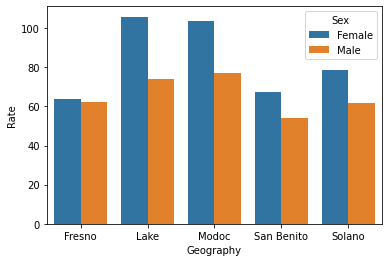

In [59]:
import seaborn as sns
df_2019 = df[df['Year']==2019]
sex_df_all = sex_df[sex_df['Age']=='All Ages']
sex_df_all_2019 = sex_df_all[sex_df_all['Year']==2019]
counties = ["Modoc","Lake","Solano","Fresno","San Benito"]
final_df = sex_df_all_2019[sex_df_all_2019.Geography.isin(counties)]
final_df.head(10)
sns.barplot(x="Geography", y="Rate", hue="Sex", data=final_df)

<AxesSubplot:xlabel='Geography', ylabel='Rate'>

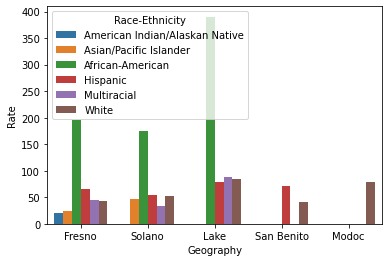

In [60]:
df_2019 = df[df['Year']==2019]
race_df_all = race_df[race_df['Age']=='All Ages']
race_df_all_2019 = race_df_all[race_df_all['Year']==2019]
counties = ["Modoc","Lake","Solano","Fresno","San Benito"]
final_df = race_df_all_2019[race_df_all_2019.Geography.isin(counties)]
final_df.head(10)
sns.barplot(x="Geography", y="Rate", hue="Race-Ethnicity", data=final_df)

In [62]:
contingency_table = pd.crosstab(index=race_df['Race-Ethnicity'], columns=race_df['Rate'])
p = chi2_contingency(contingency_table)[1]
print(p)

6.25824062053674e-55


<AxesSubplot:xlabel='Geography'>

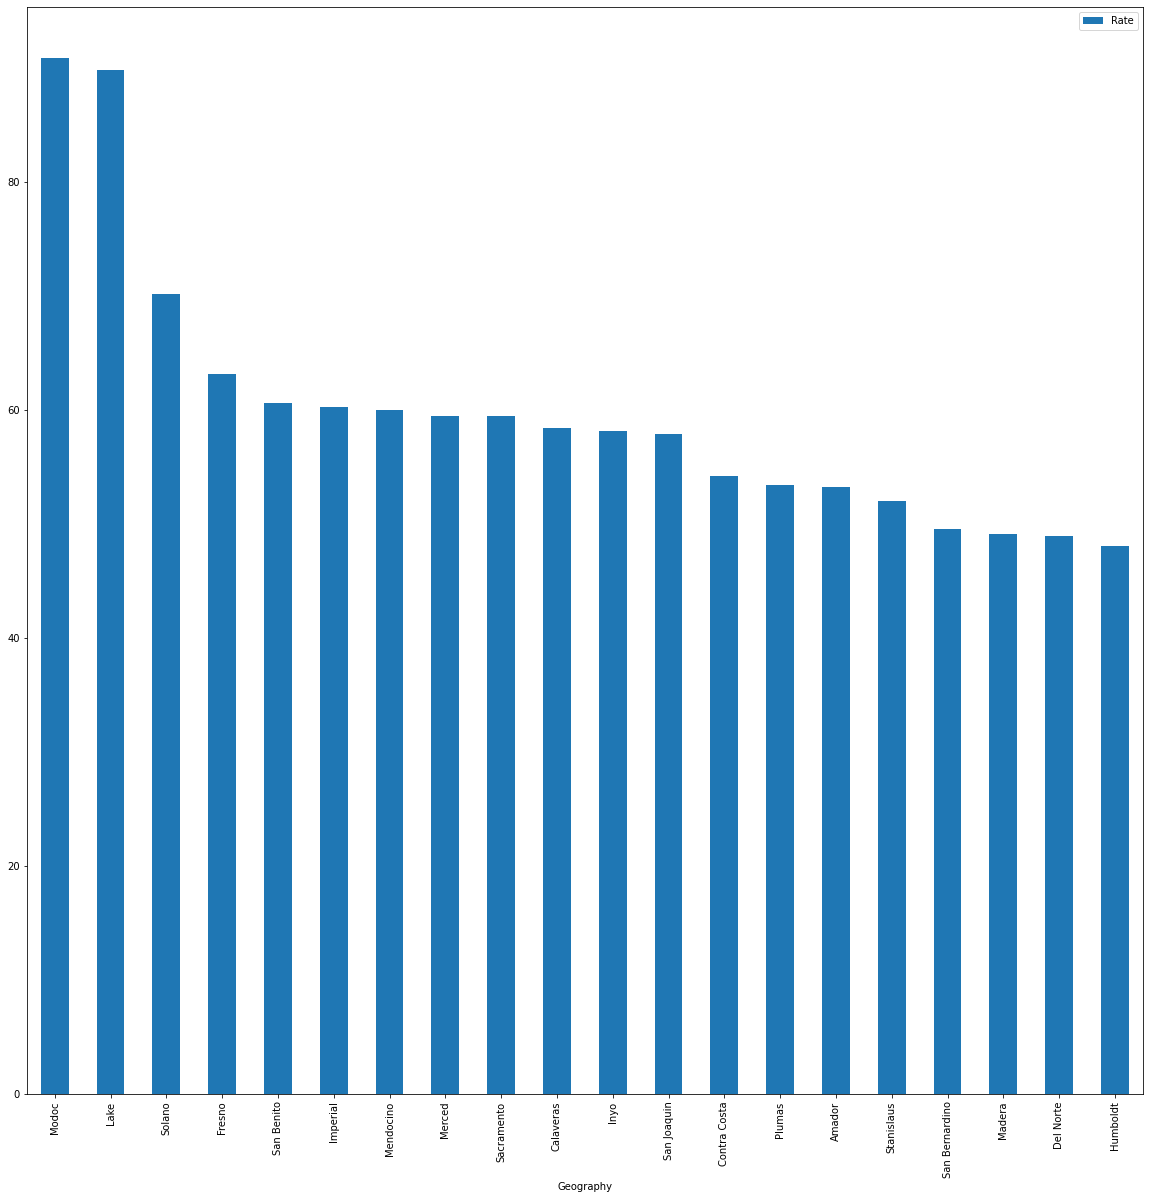

In [38]:
df_2019 = df[df['Year']==2019]
df_2019_total = df_2019[df_2019['Category']=='Total Population']
df_2019_total_all = df_2019_total[df_2019_total['Age']=='All Ages']
df_2019_total_all.nlargest(20, 'Rate',keep='first').plot.bar(x="Geography", y="Rate",figsize=(20,20))

<AxesSubplot:xlabel='Geography'>

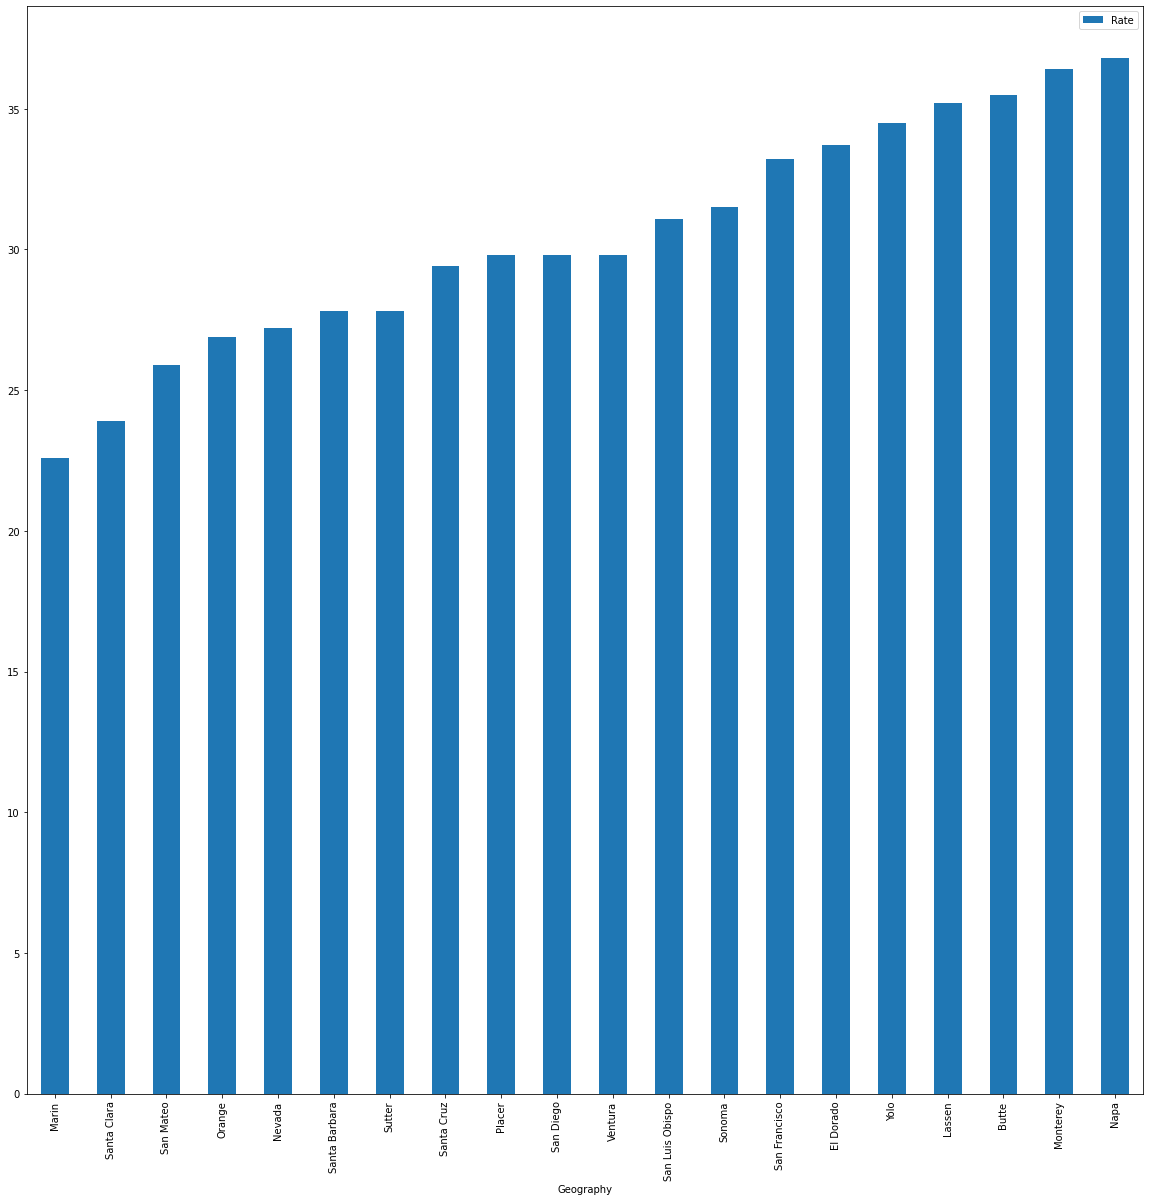

In [39]:
df_2019 = df[df['Year']==2019]
df_2019_total = df_2019[df_2019['Category']=='Total Population']
df_2019_total_all = df_2019_total[df_2019_total['Age']=='All Ages']
df_2019_total_all.nsmallest(20, 'Rate',keep='first').plot.bar(x="Geography", y="Rate",figsize=(20,20))

In [36]:
df_2019_total.nsmallest(20, 'Rate',keep='first')

,Year,Geography,Age,Category,Demographic,Count,Rate
8209,2019,Marin,18 and Over,Total Population,18 and Over,384,19.3
8218,2019,Orange,18 and Over,Total Population,18 and Over,5229,21.2
8231,2019,Santa Clara,18 and Over,Total Population,18 and Over,3312,21.7
8575,2019,Marin,All Ages,Total Population,All Ages,540,22.6
8229,2019,San Mateo,18 and Over,Total Population,18 and Over,1440,23.2
8230,2019,Santa Barbara,18 and Over,Total Population,18 and Over,809,23.4
8219,2019,Placer,18 and Over,Total Population,18 and Over,696,23.8
8238,2019,Sutter,18 and Over,Total Population,18 and Over,176,23.8
8243,2019,Ventura,18 and Over,Total Population,18 and Over,1505,23.9
8597,2019,Santa Clara,All Ages,Total Population,All Ages,4655,23.9
